Assignment number: Final Project 

Class: ISGB-7943-003

Name: Arpita Choudhury

1.1 Reading the csv file and creating a dataframe. Additionally, performing due diligence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.precision', 2)
sns.set(palette = "rainbow")

In [2]:
births = pd.read_excel("births.xlsx")
births.head()

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36


In [3]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37537 entries, 0 to 37536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  37537 non-null  int64 
 1   gender      37537 non-null  object
 2   ethnicity   37537 non-null  object
 3   first_name  37537 non-null  object
 4   frequency   37537 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [4]:
births.shape

(37537, 5)

In [5]:
births.size

187685

In [6]:
births.index

RangeIndex(start=0, stop=37537, step=1)

In [7]:
births.describe()

,birth_year,frequency
count,37537.00,37537.00
mean,2013.07,33.91
std,1.67,38.96
min,2011.00,10.00
25%,2012.00,13.00
50%,2013.00,20.00
75%,2014.00,36.00
max,2017.00,426.00


In [8]:
births.dtypes

birth_year     int64
gender        object
ethnicity     object
first_name    object
frequency      int64
dtype: object

In [9]:
births.isna().sum()

birth_year    0
gender        0
ethnicity     0
first_name    0
frequency     0
dtype: int64

Answer: Total number of rows in the dataframe    = 37537

        Total number of columns in the dataframe = 5
        
        Datatype of birth_year and frequency is integer.
        
        gender, ethnicity, first_name is of object datatype.
        
        No missing/null values noted in the dataframe.

1.2 Number of babies born in the dataset

In [46]:
births.frequency.sum()

1273006

Answer: The total number of babies born in the dataset is 1273006

1.3 Number of babies according to the gender

In [50]:
births.groupby("gender").frequency.sum()

gender
female    558728
male      714278
Name: frequency, dtype: int64

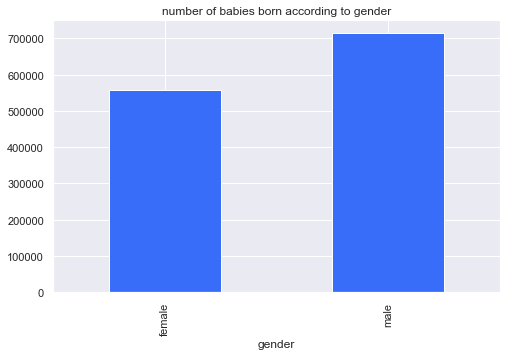

In [53]:
births.groupby("gender").frequency.sum().plot(kind="bar", figsize= (8,5),title = "number of babies born according to gender");

Answer: Out of the total babies born, 558728 were females while 714278 were males.

1.4 Number of babies born in each year

In [58]:
births.groupby("birth_year").frequency.sum().sort_values()

birth_year
2017     65395
2016     68740
2015     69600
2014    262634
2013    262686
2011    269829
2012    274122
Name: frequency, dtype: int64

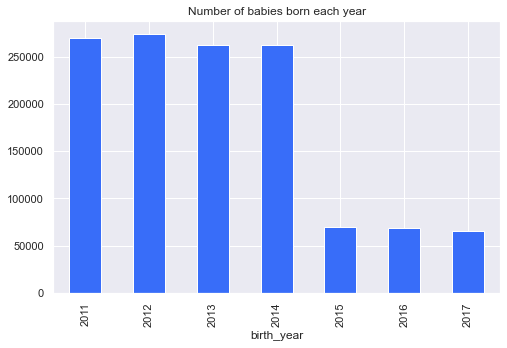

In [57]:
births.groupby("birth_year").frequency.sum().plot(kind="bar",figsize = (8,5), title="Number of babies born each year");

Answer: The maximum number of babies were born in the year 2012 while the year 2017 saw the least number of newborns.

In [17]:
df = births.replace("white non hisp", "white non hispanic").replace("black non hisp","black non hispanic").replace("asian and paci","asian and pacific islander")
df

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36
...,...,...,...,...,...
37532,2014,male,white non hispanic,yousef,18
37533,2014,male,white non hispanic,youssef,24
37534,2014,male,white non hispanic,yusuf,16
37535,2014,male,white non hispanic,zachary,90


1.5 Number of babies born out of ethnicity

In [60]:
births.groupby("ethnicity").frequency.sum()

ethnicity
asian and paci                 40085
asian and pacific islander    131935
black non hisp                 39426
black non hispanic            145804
hispanic                      425239
white non hisp                103829
white non hispanic            386688
Name: frequency, dtype: int64

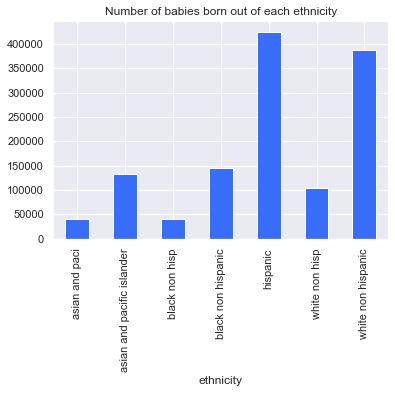

In [61]:
births.groupby("ethnicity").frequency.sum().plot(kind = "bar", title = "Number of babies born out of each ethnicity");

In [63]:
df.groupby("ethnicity").frequency.sum()

ethnicity
asian and pacific islander    172020
black non hispanic            185230
hispanic                      425239
white non hispanic            490517
Name: frequency, dtype: int64

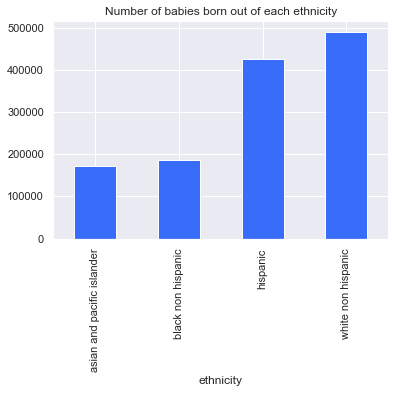

In [64]:
df.groupby("ethnicity").frequency.sum().plot(kind = "bar", title = "Number of babies born out of each ethnicity");

Answer: Majority of the babies were noted to be of "hispanic" origin while the least were from "asian and paci" origin, if we consider the births dataframe. 

While, majority of the babies were noted to be of "white non hispanic" origin and least were noted from "asian and pacific islander" if we take the df dataframe into consideration.

As per the instructions, no change was allowed to be made on excel and pandas so I created another dataframe df.

1.6 Ten most popular names in the dataset

In [65]:
popular_names = births.groupby("first_name").frequency.sum().sort_values(ascending = False)
popular_names.head(10)

first_name
ethan       12071
jacob       11762
jayden      11165
daniel      10035
matthew      9983
david        9920
michael      9796
sophia       9578
isabella     9291
aiden        9276
Name: frequency, dtype: int64

Answer: The most popular name in the dataset is "ethan". "aiden" is the 10th most popular name in the dataset.

1.7 Ten most popular female names in the dataset

In [23]:
filter1 = (births.gender == "female")
popular_female_names = births[filter1].groupby("first_name").frequency.sum().sort_values(ascending=False)
popular_female_names.head(10)

first_name
sophia      9578
isabella    9291
emma        8581
olivia      8561
mia         8094
emily       7691
leah        6756
chloe       6201
madison     6161
ava         6092
Name: frequency, dtype: int64

Answer: The most popular baby girl name in the dataset is "sophia". "ava" is the 10th most popular baby girl name in the dataset.

1.8 Checking the popularity for the name "david" 

In [24]:
filter2 = (births.first_name == "david")
david_popularity = births[filter2].groupby("birth_year").frequency.sum()
david_popularity

birth_year
2011    2014
2012    2288
2013    2332
2014    1758
2015     545
2016     476
2017     507
Name: frequency, dtype: int64

Answer: The name "david" has become less popular over the years so I think that the claim is not true.

1.9 Counting unique first names in the dataset

In [25]:
births.first_name.nunique()

1832

Answer: There are a total of 1832 distinct first names in the dataset.

1.10 Count of distinct male and female names in the dataset

In [26]:
births.groupby("gender").first_name.nunique()

gender
female    1011
male       852
Name: first_name, dtype: int64

Answer: The total number of unique female names is 1011 and that of male names is 852.

1.11 Checking for consistency of the results for 1.9 and 1.10.

Answer: No, the answers are not consistent which implies that a few of the first_names are unisex. For example: "dylan".

1.12 Creating a table to store the total number of babies according to ethnicity and year.

In [29]:
births.groupby(["ethnicity","birth_year"]).frequency.sum()    #according to births dataframe

ethnicity                   birth_year
asian and paci              2012           40085
asian and pacific islander  2011           32217
                            2013           34760
                            2014           36536
                            2015            9584
                            2016            9973
                            2017            8865
black non hisp              2012           39426
black non hispanic          2011           42045
                            2013           38548
                            2014           37728
                            2015            9637
                            2016            9147
                            2017            8699
hispanic                    2011           96743
                            2012           90782
                            2013           86585
                            2014           85529
                            2015           22813
                            20

In [30]:
df.groupby(["ethnicity","birth_year"]).frequency.sum()    #according to df dataframe

ethnicity                   birth_year
asian and pacific islander  2011           32217
                            2012           40085
                            2013           34760
                            2014           36536
                            2015            9584
                            2016            9973
                            2017            8865
black non hispanic          2011           42045
                            2012           39426
                            2013           38548
                            2014           37728
                            2015            9637
                            2016            9147
                            2017            8699
hispanic                    2011           96743
                            2012           90782
                            2013           86585
                            2014           85529
                            2015           22813
                            20

Answer: The blank spaces refer to the ethnicity group above it. In the year 2011, maximum babies were born of "white non hispanic" origin. Over the years, "black non hispanic" origin babies recorded the least number of births.

1.13 To compare the number of female to male babies.

In [66]:
births.groupby(["gender","birth_year"]).frequency.sum()

gender  birth_year
female  2011          117700
        2012          119406
        2013          115183
        2014          116590
        2015           30592
        2016           30360
        2017           28897
male    2011          152129
        2012          154716
        2013          147503
        2014          146044
        2015           39008
        2016           38380
        2017           36498
Name: frequency, dtype: int64

Answer: Yes, the number of females born in NYC has lessened over the years when compared with the number of males born.

2.1 Performing due diligence and summarizing house prices in the community 

In [32]:
house_price = pd.read_excel("house_prices.xlsx")
house_price.head()

,address,price,acres,size_sqft,age,rooms,baths,garages
0,9 Sycamore Road,466.0,0.23,2448,46,7,3.5,2
1,21 Jefferson St,364.0,0.22,1942,51,7,2.5,1
2,38 Hitching Post Lane,429.0,0.16,2073,29,5,3.0,2
3,4 Poppy Lane,548.4,0.46,2707,18,8,2.5,1
4,5 Daniel Drive,405.9,0.25,2042,46,7,1.5,1


In [33]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    30 non-null     object 
 1   price      30 non-null     float64
 2   acres      30 non-null     float64
 3   size_sqft  30 non-null     int64  
 4   age        30 non-null     int64  
 5   rooms      30 non-null     int64  
 6   baths      30 non-null     float64
 7   garages    30 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ KB


In [34]:
house_price.shape

(30, 8)

In [35]:
house_price.size

240

In [36]:
house_price.index

RangeIndex(start=0, stop=30, step=1)

In [37]:
house_price.dtypes

address       object
price        float64
acres        float64
size_sqft      int64
age            int64
rooms          int64
baths        float64
garages        int64
dtype: object

In [38]:
house_price.isna().sum()

address      0
price        0
acres        0
size_sqft    0
age          0
rooms        0
baths        0
garages      0
dtype: int64

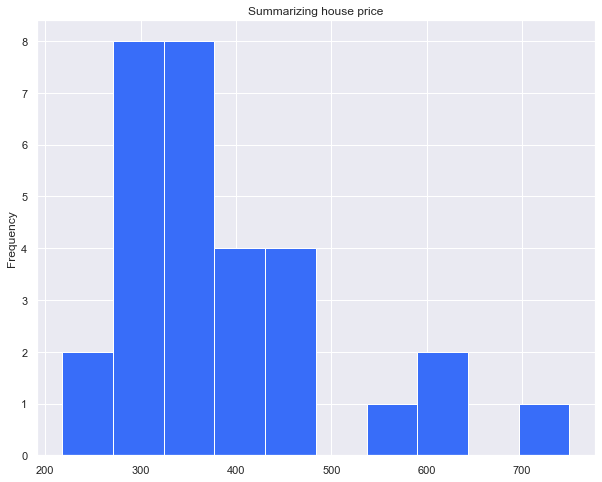

In [39]:
house_price.price.plot(kind="hist",figsize = (10,8), title="Summarizing house price");

Answer: Majority of the house prices are in the 300-400 price range.

2.2 Variation in the house price with the number of rooms

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


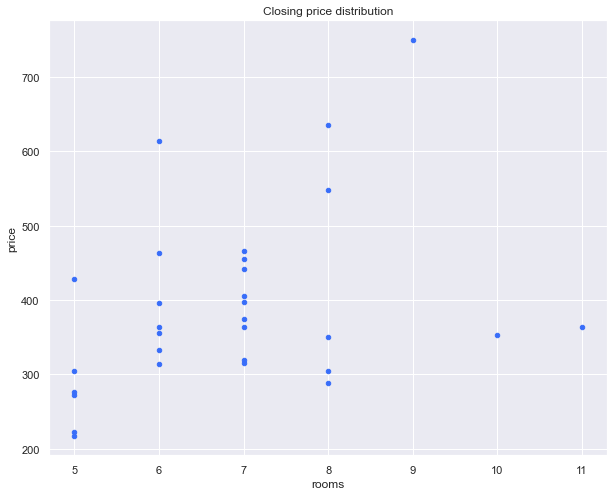

In [40]:
house_price.plot(x = "rooms", y = "price", kind= "scatter", figsize =(10,8), title = "Closing price distribution");

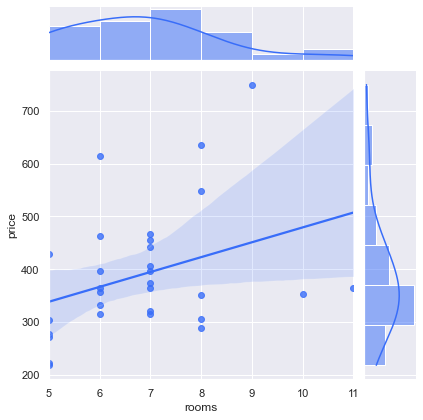

In [41]:
sns.jointplot(data=house_price, x="rooms", y="price", kind = "reg");

Answer: The number of rooms have a fairly strong relationship with the price. Though the price is not greatly influenced by the number of rooms.

2.3 Relationship between price and other attributes

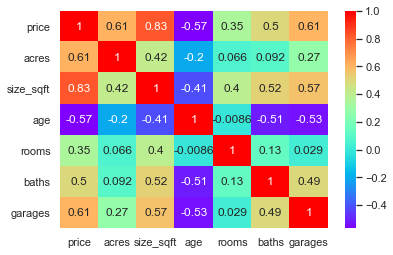

In [42]:
house_price_corr = house_price.corr()
sns.heatmap(data=house_price_corr, annot = True, cmap = "rainbow");

2.4 Answer: "size_sqft" had the greatest influence on the price. The second most influential attribute on price would be "acres" and "garages".

In [119]:
import getpass
import datetime
print("\n\n\nFinished execution at  ", datetime.datetime.now())
print(getpass.getuser())




Finished execution at   2021-12-13 01:43:47.757777
arpit
